In [423]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import statsmodels.api as sm
import seaborn as sns

In [424]:
data = pd.read_excel("HW_Data_Set.xlsx" )

In [425]:
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [426]:
data.shape

(6167, 136)

In [427]:
data.columns

Index(['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13',
       'ind_14', 'ind_15', 'ind_16',
       ...
       'ind_416', 'ind_418', 'ind_420', 'ind_422', 'ind_424', 'ind_426',
       'ind_428', '20_target', '50_target', '90_target'],
      dtype='object', length=136)

In [428]:
data.isnull().values.any()#NanN data var mi yok mu 

False

In [429]:
data.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [430]:
X = data.drop(['50_target','20_target','90_target'], axis = 1 )#bagimsiz degiskenlerini sectim

In [431]:
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522


In [432]:
X =sm.add_constant(X) #sabit deger ekledik 
X[0:5]

C:\Users\jadee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,1.0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,...,-27,0.002371,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906
1,1.0,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,...,-31,0.003074,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833
2,1.0,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,...,-30,0.003561,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040
3,1.0,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,...,-30,0.004366,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418
4,1.0,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,...,-45,0.004198,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522


In [433]:
for i in X:
    if X.dtypes[i] == 'object':
        X=X.drop(columns=[i])#turu object olan sutunu sildim

In [434]:
X_col = X.columns

In [435]:
X_col 

Index(['const', 'ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12',
       'ind_13', 'ind_14', 'ind_15',
       ...
       'ind_406', 'ind_407', 'ind_410', 'ind_412', 'ind_414', 'ind_416',
       'ind_418', 'ind_424', 'ind_426', 'ind_428'],
      dtype='object', length=131)

In [436]:
#3 bagimli degiskenimiz var her bagimli degisken hangi bagimsiz degiskenler ile en yuksek correlation var bulmak icin

cor_list50 = []
cor_list50cols = []
cor_list90 = []
cor_list90cols = []
cor_list20 = []
cor_list20cols = []
for degisken in X_col:
    
    corr50 = data['50_target'].corr(X[degisken])
    corr90 = data['90_target'].corr(X[degisken])
    corr20 = data['20_target'].corr(X[degisken])
    if (corr50 >= 0.1 ): 
        cor_list50.append(corr50)
        cor_list50cols.append(degisken)
    
    if (corr20 >= 0.1 ): 
        cor_list20.append(corr20)
        cor_list20cols.append(degisken)
    if (corr90 >= 0.1 ): 
        cor_list90.append(corr90)
        cor_list90cols.append(degisken)

In [437]:
cor_list20

[]

In [438]:
cor_list50

[0.10177429808414756,
 0.12109737965080733,
 0.12705730960331238,
 0.10405673493583943,
 0.12723438700801443]

In [439]:
cor_list50cols

['ind_16', 'ind_17', 'ind_18', 'ind_332', 'ind_412']

In [440]:
cor_list90

[0.10807700271588316,
 0.12927711877633324,
 0.14087679463003316,
 0.11500150512229604,
 0.12426474991040602]

In [441]:
cor_list90cols

['ind_16', 'ind_17', 'ind_18', 'ind_332', 'ind_412']

In [446]:
X = data[['ind_16', 'ind_17', 'ind_18', 'ind_332', 'ind_412']]

In [447]:
y =data[['90_target']]

In [448]:
frames = [X,y]

In [449]:
data = pd.concat(frames,axis=1)

In [450]:
data.head()

,ind_16,ind_17,ind_18,ind_332,ind_412,90_target
0,11.73,12.060000,9.1100,20.967742,0.002371,36.997753
1,12.22,11.326667,9.2225,20.800000,0.003074,37.016198
2,12.28,10.973333,9.3125,20.634921,0.003561,-37.024805
3,12.61,10.426667,9.4150,20.472441,0.004366,-37.040483
4,14.25,11.406667,9.8925,20.312500,0.004198,-37.103503


In [451]:
data.corr()

,ind_16,ind_17,ind_18,ind_332,ind_412,90_target
ind_16,1.000000,0.921295,0.429029,0.039247,-0.025170,0.108077
ind_17,0.921295,1.000000,0.545873,0.064045,-0.036754,0.129277
ind_18,0.429029,0.545873,1.000000,0.160939,-0.018460,0.140877
ind_332,0.039247,0.064045,0.160939,1.000000,0.077782,0.115002
ind_412,-0.025170,-0.036754,-0.018460,0.077782,1.000000,0.124265
90_target,0.108077,0.129277,0.140877,0.115002,0.124265,1.000000


In [452]:
data = data.drop('ind_16', axis=1)

In [453]:
X = data.drop('90_target' ,axis = 1)

In [454]:
lm = sm.OLS(y,X)
model =lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     47.04
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           5.23e-39
Time:                        18:12:49   Log-Likelihood:                -30924.
No. Observations:                6167   AIC:                         6.186e+04
Df Residuals:                    6163   BIC:                         6.188e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_17         0.5689      0.123      4.616      0.000       0.327       0.810
ind_18        -0.8999      0.131     -6.876      0.000      -1.156      -0.643
ind_332        0.1093      0.015      7.367      0.000       0.080       0.138
ind_412      760.5142     82.291      9.242      0.000     599.195     921.833
==============================================================================
Omnibus:                    23562.845   Durbin-Watson:                   0.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              909.234
Skew:                           0.170   Prob(JB):                    3.65e-198
Kurtosis:                       1.150   Cond. No.                     6.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [455]:
model.params

ind_17       0.568850
ind_18      -0.899907
ind_332      0.109306
ind_412    760.514156
dtype: float64

In [456]:
model.conf_int()#guven araligi kucuk olmasi gerekiyor 

,0,1
ind_17,0.327253,0.810447
ind_18,-1.156468,-0.643346
ind_332,0.080219,0.138393
ind_412,599.195339,921.832972


In [457]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [458]:
model1= reg.fit(X,y)

In [459]:
model1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [460]:
model1.intercept_

array([-26.50489897])

In [461]:
model1.coef_

array([[6.74555132e-01, 1.14729230e+00, 1.00478038e-01, 7.94789150e+02]])

In [462]:
model1.score(X,y)

0.047643427956953976

In [463]:
from sklearn.model_selection import train_test_split , cross_val_score ,cross_val_predict

X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.20 , random_state = 42)


In [464]:
X_train.shape

(4933, 4)

In [465]:
lm = sm.OLS(y_train ,X_train )

In [466]:
model = lm.fit()

In [467]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              90_target   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     44.97
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           3.76e-37
Time:                        18:14:39   Log-Likelihood:                -24725.
No. Observations:                4933   AIC:                         4.946e+04
Df Residuals:                    4929   BIC:                         4.948e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ind_17         0.5762      0.136      4.233      0.000       0.309       0.843
ind_18        -0.9305      0.144     -6.445      0.000      -1.214      -0.647
ind_332        0.1260      0.017      7.548      0.000       0.093       0.159
ind_412      820.4158     92.548      8.865      0.000     638.981    1001.851
==============================================================================
Omnibus:                    19244.575   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.568
Skew:                           0.174   Prob(JB):                    1.85e-155
Kurtosis:                       1.171   Cond. No.                     6.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

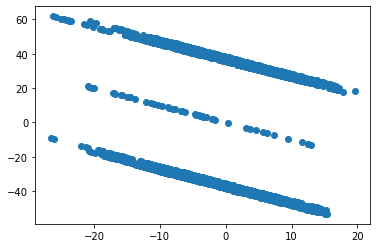

In [470]:
resid = model.resid
plt.scatter(model.predict(),resid)#verdigi sonuc guvenli degil cunku random olmasi gerekiyor 

In [472]:
from patsy import dmatrices 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [474]:
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [475]:
vif

[11.192254958657863,
 11.572566230475005,
 1.2857495207754976,
 1.0084718656438538]

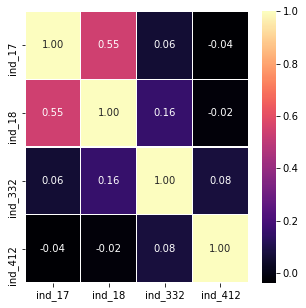

In [478]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(X.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [476]:
import matplotlib.pyplot as plt 

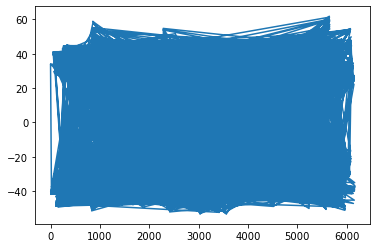

In [477]:
plt.plot(model.resid)# hata dagilimi random olmasi gerekiyor 